$ \Large \epsilon y'' = y'^2 \\ \Large y(0)=1 \\ \Large y(1)=0$

### Analitycal solution
$ \Large y =- \epsilon ln(x/\epsilon + A) + B \\ \Large A = \frac{1}{\epsilon (e^{1/\epsilon} - 1)} \\ \Large B = \epsilon ln(\frac{1}{\epsilon} + A) $

In [530]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [531]:
def A(eps):
    return 1/(eps * (np.exp(1 / eps) - 1))

def B(eps):
    return eps * np.log(1 / eps + A(eps))

def y(x):
    return -eps * np.log(x/eps + A(eps)) + B(eps)

In [568]:
c_y0 = 1
c_y1 = 0
h = 1e-3
n = int(1 / h)
eps = 0.01

def d2y(dy):
    return dy**2 * eps

In [569]:
def euler_method(y0, dy0):
    y0 = y0 / eps
    dy0 = dy0 / eps
    dy = np.zeros(n)
    dy[0] = dy0
    for i in range(1, n):
        dy[i] = dy[i - 1] + d2y(dy[i - 1]) * h
    
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        y[i] = y[i - 1] + h * dy[i]
    
    return eps * y

In [570]:
def d(f, x):
    return (f(x + h) - f(x)) / h

def newtone_method(f, x0, e):
    x_cur = x0
    k = 0
    while np.abs(f(x_cur)/d(f, x_cur)) > e:
        x_cur = x_cur - f(x_cur) / d(f, x_cur)
    return x_cur

In [571]:
def solve():
    dy0 = -5
    y0 = newtone_method(lambda y : euler_method(y, dy0)[0] - c_y0, 0, 1e-6)
    dy0 = newtone_method(lambda dy : euler_method(y0, dy)[-1] - c_y1, dy0, 1e-6)
    return euler_method(y0, dy0)

In [572]:
solution = solve()

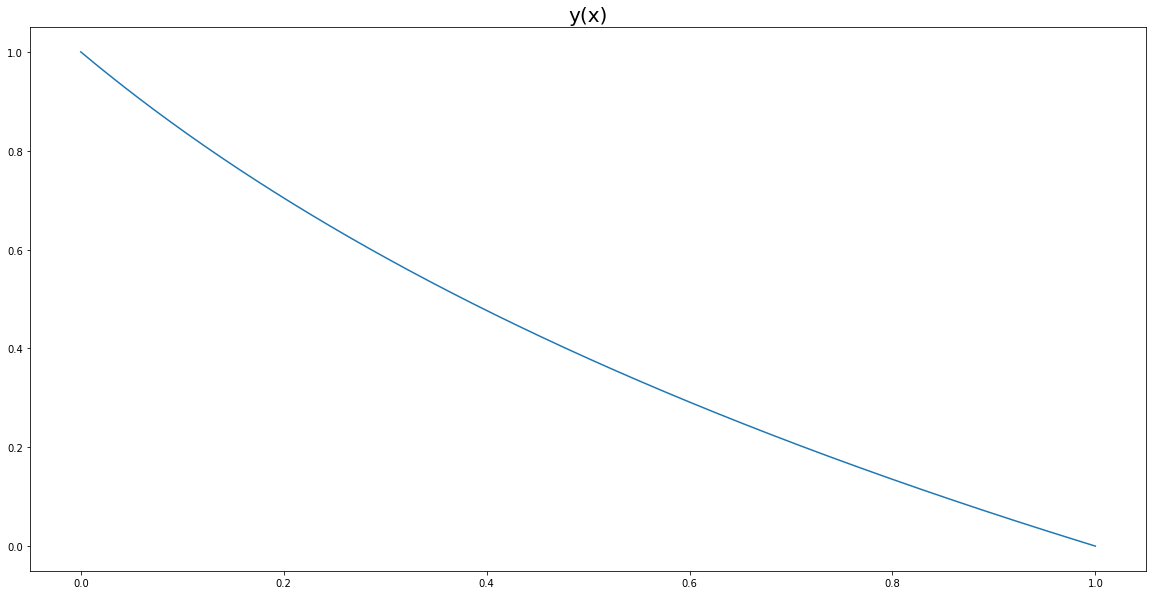

In [573]:
fig, ax = plt.subplots(figsize=(20,10))
x = np.linspace(0, 1, n)
ax.plot(x, solution)
ax.set_title("y(x)", fontsize=20)
plt.show()